In [2]:
# Suitable habitat per species for climatological (historical) data
# use T and DO, surface and bottom
# per species

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') # filter some warning messages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [42]:
# large data path
ldp = '~/Documents/LargeData/'
ldom = np.array([[45, 49],[-126, -123]])
qbox = np.array([[-124.05,-124.33,-125.07,-124.774,-124.05],[46.53,47.4,47.4,46.53,46.53]])
months=['January','February','March','April','May','June','July','August','September','October','November','December']


In [43]:
#get bathymetry from ETOPO1
fn = ldp+'/Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)
#ldom = np.array([[42, 50],[-130, -122]])


In [40]:
fdir = ldp+'QIN/Glorys_Model/'
ds_T = xr.open_dataset(fdir+'climatology_glorys12v1_thetao_v1.nc')
ds_T.close()
dx = ds_T.lon  #21601
dy = ds_T   #10801
X,Y=np.meshgrid(x,y)
ds_T.depth.values

array([4.940250e-01, 1.541375e+00, 2.645669e+00, 3.819495e+00,
       5.078224e+00, 6.440614e+00, 7.929560e+00, 9.572997e+00,
       1.140500e+01, 1.346714e+01, 1.581007e+01, 1.849556e+01,
       2.159882e+01, 2.521141e+01, 2.944473e+01, 3.443415e+01,
       4.034405e+01, 4.737369e+01, 5.576429e+01, 6.580727e+01,
       7.785385e+01, 9.232607e+01, 1.097293e+02, 1.306660e+02,
       1.558507e+02, 1.861256e+02, 2.224752e+02, 2.660403e+02,
       3.181274e+02, 3.802130e+02, 4.539377e+02, 5.410889e+02,
       6.435668e+02, 7.633331e+02, 9.023393e+02, 1.062440e+03,
       1.245291e+03, 1.452251e+03, 1.684284e+03, 1.941893e+03,
       2.225078e+03, 2.533336e+03, 2.865703e+03, 3.220820e+03],
      dtype=float32)

## for surface, 'bottom' (needs to be calculated), and 2 mid depths, plot suitable areas

# Dungeness Crab and Razon Clams
## Depth range: [40/5-90/28] -> surface : 40 : 100
## Distance from shore: [0-89-59] -> 100k
## Temperature: [5.36/5.99-11.72/12.73] -> 5.5 : 12

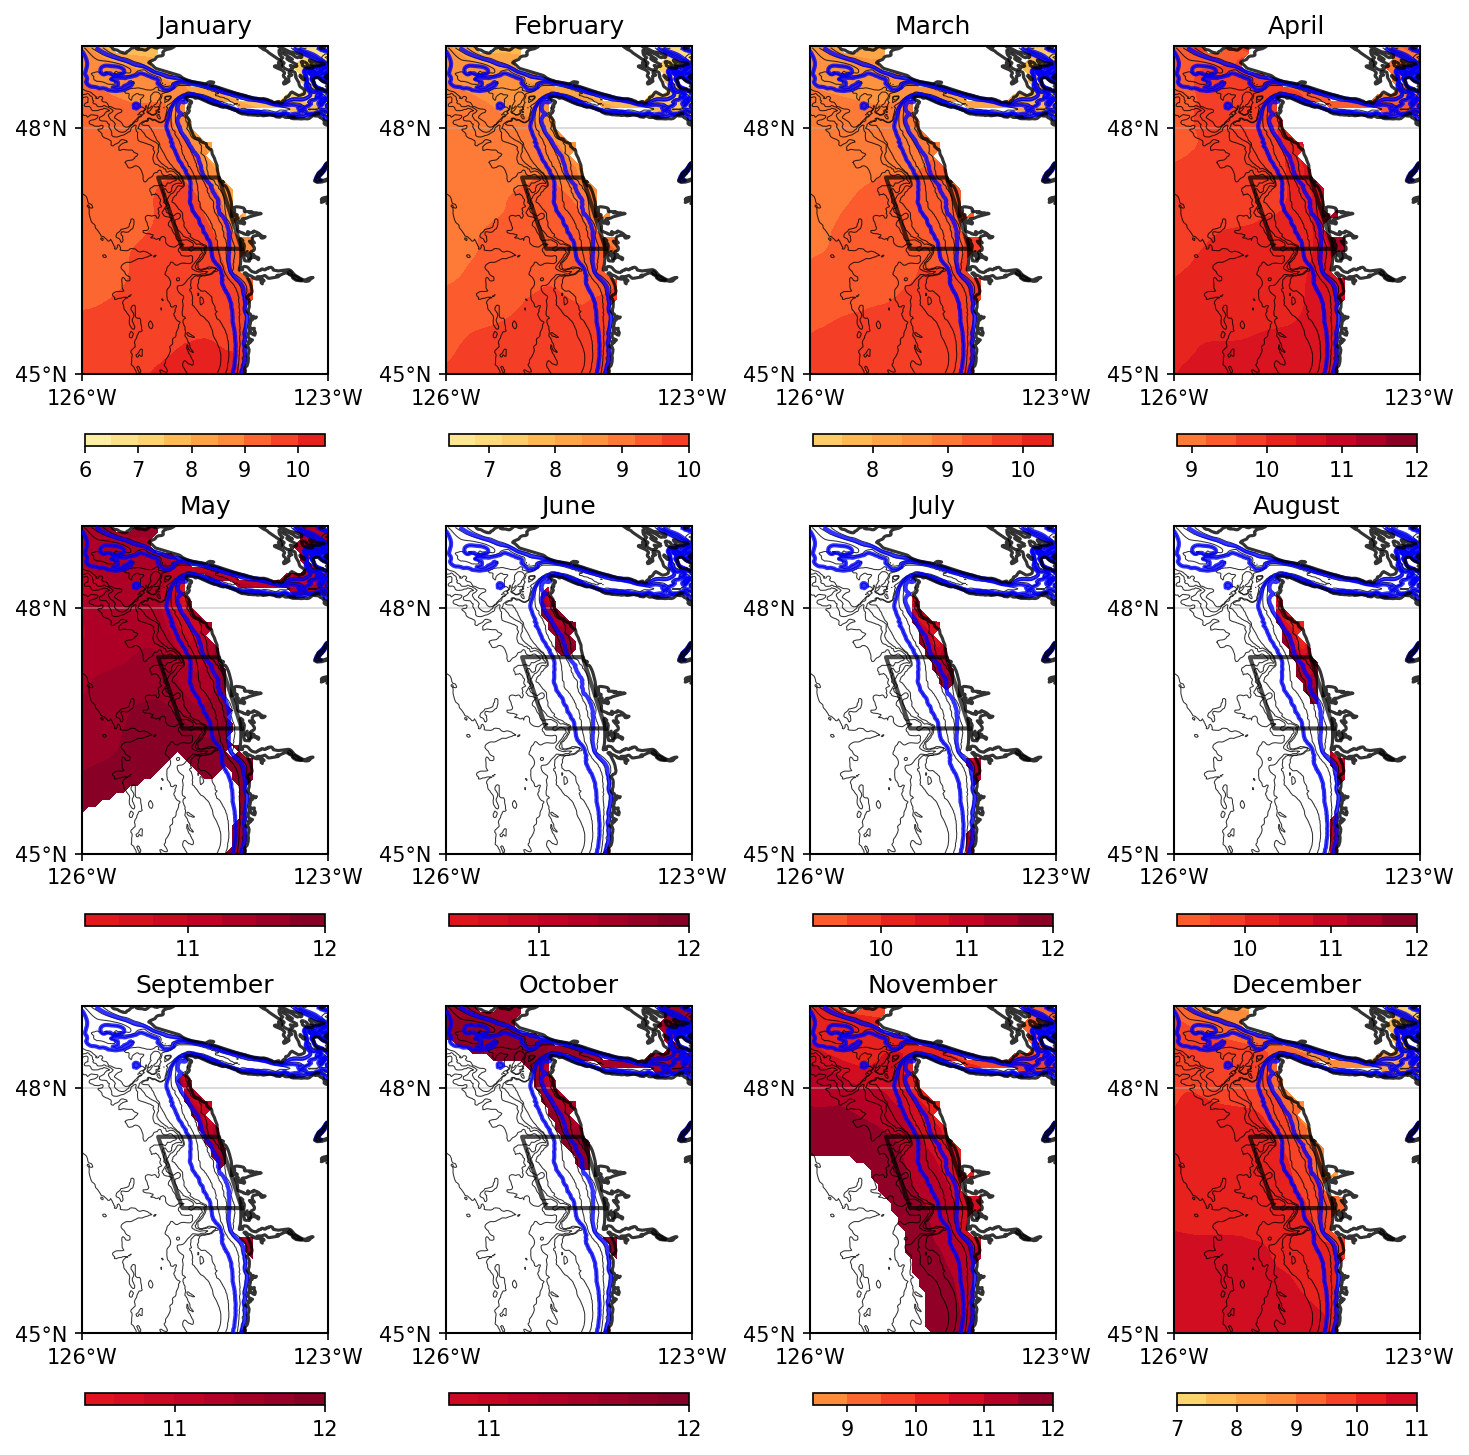

In [50]:
vmlim=5.5
vxlim=12
fig=plt.figure(figsize=(12,12),dpi=150)
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,3)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,3)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
    #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
    plt.contour(X,Y,topo2,[ -100,-40],colors='b',linewidths=2, linestyles='solid', zorder=3, alpha=0.8)
    plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)
    
    tmp = ds_T.thetao[i,4,:,:].sel(lon=slice(360+ldom[1,0],360+ldom[1,1]+1),lat=slice(ldom[0,0],ldom[0,1]))
    tmp = tmp.where((tmp>vmlim)&(tmp<=vxlim))
    plt.contourf(tmp.lon, tmp.lat, tmp, cmap='YlOrRd',vmin=vmlim, vmax=vxlim)
    plt.colorbar(fraction=0.03, orientation='horizontal', ticks=[*range(5,13)])
    plt.title(months[i])
    
plt.tight_layout(h_pad=1)

#fig.savefig('./map_base_xsmall.png')
plt.show()

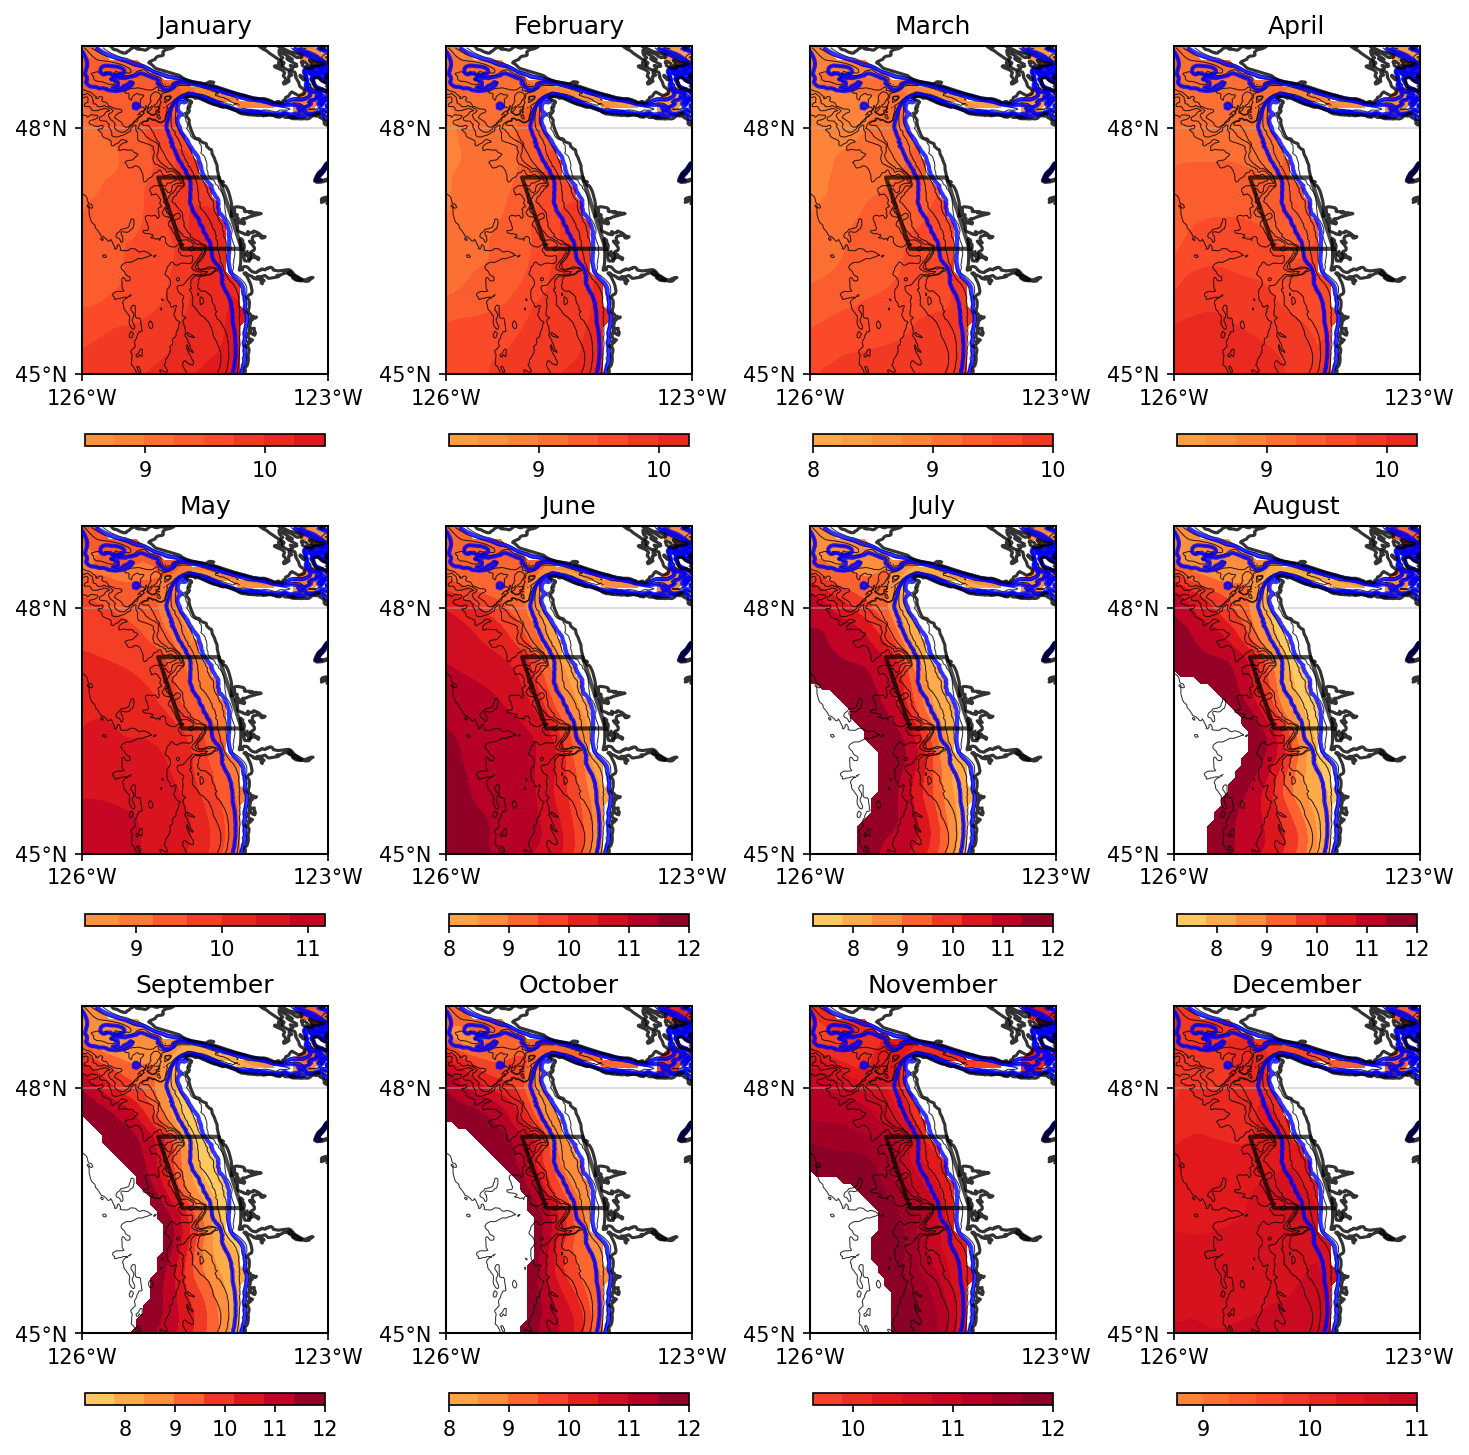

In [51]:
vmlim=5.5
vxlim=12
fig=plt.figure(figsize=(12,12),dpi=150)
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(ldom[1,0],ldom[1,1]+1,3)], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(ldom[0,0],ldom[0,1]+1,3)], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
    #ax.set_aspect(1.5)
    plt.contour(X,Y,topo2,[-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
    plt.contour(X,Y,topo2,[ -100,-40],colors='b',linewidths=2, linestyles='solid', zorder=3, alpha=0.8)
    plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)
    
    tmp = ds_T.thetao[i,15,:,:].sel(lon=slice(360+ldom[1,0],360+ldom[1,1]+1),lat=slice(ldom[0,0],ldom[0,1]))
    tmp = tmp.where((tmp>vmlim)&(tmp<=vxlim))
    plt.contourf(tmp.lon, tmp.lat, tmp, cmap='YlOrRd',vmin=vmlim, vmax=vxlim)
    plt.colorbar(fraction=0.03, orientation='horizontal', ticks=[*range(5,13)])
    plt.title(months[i])
    
plt.tight_layout(h_pad=1)

#fig.savefig('./map_base_xsmall.png')
plt.show()